# AutoEncoder - MNIST Digits

In this notebook we use Tensorflow/Keras to build a classifier for handwritten numbers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.datasets import fashion_mnist

Want to be sure it's version 2 ! 

In [3]:
print(tf.__version__)

2.7.0


## Load the data

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train_s, x_test_s = x_train.reshape(60000, 784) / 255, x_test.reshape(10000, 784) / 255

In [7]:
x_train_s.shape

(60000, 784)

In [8]:
x_train_s[0].shape

(784,)

In [9]:
x_test.shape

(10000, 28, 28)

## Build a Stacked Auto-Encoder

In [10]:
encoder = Sequential()
encoder.add(Dense(400,  activation='relu', input_shape=(784,)))
encoder.add(Dense(200,  activation='relu'))
encoder.add(Dense(100,  activation='relu'))
encoder.add(Dense(50,   activation='relu'))
encoder.add(Dense(20,   activation='relu'))

In [11]:
decoder = Sequential()
decoder.add(Dense(50,  input_shape=[20], activation='relu'))
decoder.add(Dense(100,  activation='relu'))
decoder.add(Dense(200,  activation='relu'))
decoder.add(Dense(400,  activation='relu'))
decoder.add(Dense(784,  activation='sigmoid'))

In [12]:
autoencoder = Sequential([encoder, decoder])

We compile this - we choose the adam optimizer and maximize cross entropy and report the accuracy.

In [13]:
autoencoder.compile(loss='binary_crossentropy', 
                    metrics = ['accuracy'], 
                    optimizer = Adam())

In [14]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 20)                420370    
                                                                 
 sequential_1 (Sequential)   (None, 784)               421134    
                                                                 
Total params: 841,504
Trainable params: 841,504
Non-trainable params: 0
_________________________________________________________________


In [15]:
trained_model = autoencoder.fit(x_train_s, x_train_s, batch_size=1024, 
                                epochs=10, verbose=1, 
                                validation_data=(x_test_s, x_test_s))

Epoch 1/10
59/59 [==============================] - 3s 33ms/step - loss: 0.3282 - accuracy: 0.0074 - val_loss: 0.2566 - val_accuracy: 0.0137
Epoch 2/10
59/59 [==============================] - 2s 31ms/step - loss: 0.2496 - accuracy: 0.0117 - val_loss: 0.2378 - val_accuracy: 0.0109
Epoch 3/10
59/59 [==============================] - 2s 31ms/step - loss: 0.2208 - accuracy: 0.0137 - val_loss: 0.2043 - val_accuracy: 0.0161
Epoch 4/10
59/59 [==============================] - 2s 30ms/step - loss: 0.1945 - accuracy: 0.0104 - val_loss: 0.1788 - val_accuracy: 0.0089
Epoch 5/10
59/59 [==============================] - 2s 32ms/step - loss: 0.1693 - accuracy: 0.0088 - val_loss: 0.1595 - val_accuracy: 0.0067
Epoch 6/10
59/59 [==============================] - 2s 31ms/step - loss: 0.1553 - accuracy: 0.0087 - val_loss: 0.1507 - val_accuracy: 0.0110
Epoch 7/10
59/59 [==============================] - 2s 32ms/step - loss: 0.1493 - accuracy: 0.0105 - val_loss: 0.1466 - val_accuracy: 0.0115
Epoch 8/10
59

## Using the AutoEncoder

How well does the AutoEncoder Reconstruct the Images ?

Original Image


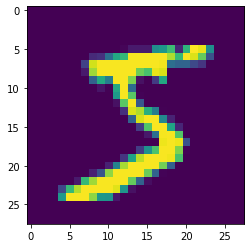

Reconstructed Image


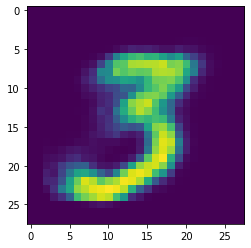

[5.92846859]
Original Image


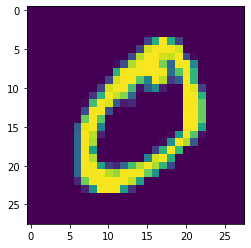

Reconstructed Image


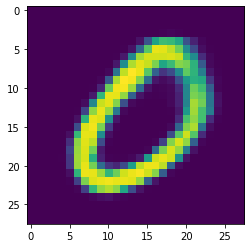

[3.60923011]
Original Image


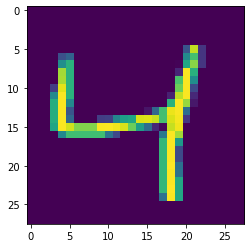

Reconstructed Image


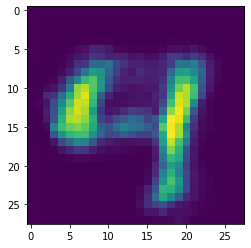

[5.53288751]


In [16]:
for i in range(0, 3):

    x_img = x_train_s[i]
    inputs = x_img.reshape(1,784)
    target_data = autoencoder.predict(inputs)
    dist = np.linalg.norm(inputs - target_data, axis=-1)
    print("Original Image")
    plt.imshow(x_train[i])
    plt.show()
    print("Reconstructed Image")
    plt.imshow(target_data.reshape(28,28))
    plt.show()
    print(dist)

Look small. Now compare it to an image I made by hand.

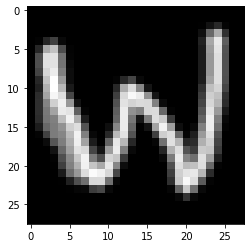

In [17]:
from tensorflow.keras.preprocessing import image

img = image.load_img("./not_a_digit.png", target_size=(28, 28), 
                     color_mode = "grayscale")
plt.imshow(img, cmap='gray')
plt.show()

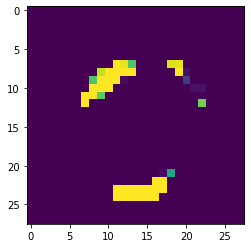

[2326.5889]


In [19]:
input_img = image.img_to_array(img)
inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
plt.imshow(target_data.reshape(28,28))
plt.show()

dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

Looks like an anomaly.